## Koch Snowflake

We construct the **Koch snowflake** by iterating on an initial equilateral triangle.

### Step 0 — Initial shape

Let $K_0$ be an equilateral triangle of side length $ s $.

### Step 1 — Koch rule on one segment

Given a line segment from point $ A $ to point $ B $:

1. Divide the segment into three equal parts.
2. Let the division points be $ P_1 $ and $ P_2 $, so:
   $$
   P_1 = A + \frac{1}{3}(B - A), \qquad
   P_2 = A + \frac{2}{3}(B - A)
   $$
3. Construct an equilateral triangle outward on the middle segment $ P_1P_2 $.
   The new vertex $ P_3 $ is:
   $$
   P_3 = \frac{P_1 + P_2}{2}
         + \frac{\sqrt{3}}{6}\, R_{\perp}(B - A)
   $$
   where $ R_{\perp} $ rotates a vector by $ +90^\circ $ (counter–clockwise).

4. Replace the original segment $ AB $ with the four segments:
   $$
   A \rightarrow P_1 \rightarrow P_3 \rightarrow P_2 \rightarrow B
   $$

### Iteration

Apply this **Koch rule simultaneously to every segment** of $ K_n $ to obtain $ K_{n+1} $.

- $ K_0 $: equilateral triangle  
- $ K_1 $: triangle with one “bump” on each side  
- $ K_2, K_3, \dots $: increasingly detailed snowflake

The **Koch snowflake** is the limit shape as $ n \to \infty $.

In [ ]:
import numpy as np
import pyvista as pv
pv.set_jupyter_backend('trame') # or 'pyvistaqt'
import matplotlib.pyplot as plt

In [ ]:
def koch_3d(points, depth):
    if depth == 0:
        return points

    new_points = []
    for i in range(len(points)-1):
        p1 = points[i]
        p2 = points[i+1]

        # Divide edge
        v = p2 - p1
        A = p1 + v/3
        B = p1 + 2*v/3

        # Create 3D spike using perpendicular vector
        perp = np.cross(v, np.array([0,0,1]))
        perp = perp / np.linalg.norm(perp)

        C = A + perp * np.linalg.norm(v)/3

        new_points += [p1, A, C, B]

    new_points.append(points[-1])
    return koch_3d(np.array(new_points), depth-1)

# Create base triangle
r = 1
pts = np.array([
    [0, r, 0],
    [-np.sqrt(3)/2*r, -0.5*r, 0],
    [np.sqrt(3)/2*r, -0.5*r, 0],
    [0, r, 0]  # close loop
])

snow = koch_3d(pts, 3)

plotter = pv.Plotter(notebook=True)
plotter.add_points(snow, color='cyan', point_size=4)
plotter.show()

In [ ]:
import numpy as np

def koch_step(points):
    """Take one Koch iteration on a closed polygon defined by complex points."""
    new_points = []
    for i in range(len(points) - 1):
        z0 = points[i]
        z4 = points[i + 1]

        # 1/3 and 2/3 points
        z1 = z0 + (z4 - z0) / 3
        z3 = z0 + 2 * (z4 - z0) / 3

        # peak of the equilateral triangle (rotate middle segment by +60 degrees)
        rot60 = np.exp(1j * np.pi / 3)  # e^{iπ/3}
        z2 = z1 + (z3 - z1) * rot60

        new_points += [z0, z1, z2, z3]
    new_points.append(points[-1])
    return np.array(new_points, dtype=complex)

def initial_equilateral(side=1.0):
    """Equilateral triangle as complex points, closed (first = last)."""
    z0 = 0 + 0j
    z1 = side + 0j
    z2 = side/2 + side * np.sqrt(3)/2 * 1j
    return np.array([z0, z1, z2, z0], dtype=complex)

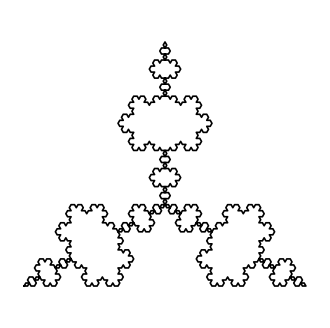

In [10]:
pts = initial_equilateral(1.0)
for _ in range(4):   # 4 iterations
    pts = koch_step(pts)

plt.figure(figsize=(4,4))
plt.plot(pts.real, pts.imag, color="black", linewidth=1.2)
plt.axis('equal')
plt.axis('off')

plt.savefig("koch_snowflake.svg", format="svg", bbox_inches="tight")
plt.show()